# **TDP Week 4** - Magnetic diagnostics

## Spectrogram and power spectrum:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sdas.tests.LoadSdasData import LoadSdasData
from sdas.tests.StartSdas import StartSdas

plt.style.use('bmh')

In [2]:
# Load and select data
shot = 35057
client = StartSdas()

d={} # Empty dictionary: Reading data for all 'good' coils.
for x in range(2,13): # For looping 
    if(x<10):
        d["Coil{0}".format(x)]= LoadSdasData(client, "PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_00{0}".format(x), shot)
    elif(x!=11):
        d["Coil{0}".format(x)]= LoadSdasData(client, "PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_0{0}".format(x), shot)

# d['Coil{x}'][0] -> '$dB_{\theta}/dt$ (a.u.)'
# d['Coil{x}'][1] -> Time

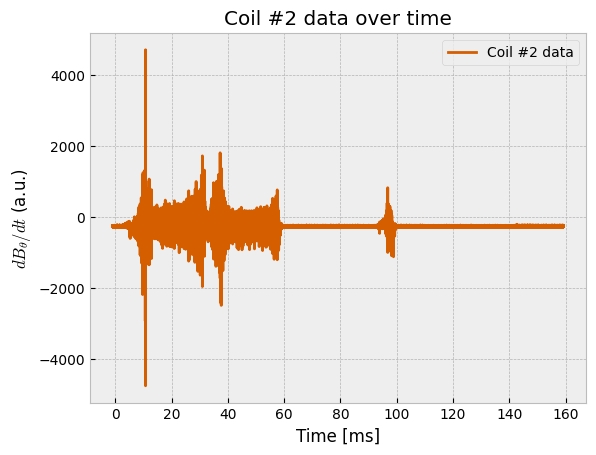

<Figure size 640x480 with 0 Axes>

In [5]:
# Getting to know our data:

# Definitions:
time_2 = d['Coil2'][1]
Coil_2_data = d['Coil2'][0]

# Plotting:
plt.plot(time_2*1e-3, Coil_2_data, 'C4-', label=r'Coil #2 data')

plt.xlabel(r'Time [ms]')
plt.ylabel(r'$dB_{\theta}/dt$ (a.u.)')
plt.title('Coil #2 data over time')
plt.grid(True)
plt.legend()
plt.savefig('Coil2(t).png', format = 'png', dpi = 350)
plt.show()
plt.clf()

# Here, only 1 cycle is seen.

In [139]:
fs = float(1/(time_2[1] - time_2[0])*1e6)
NFFT = 2048 # Number of points used in FFT calculation.
Delta_t = 1/fs
Delta_T = NFFT * Delta_t
Delta_f = 1/Delta_T

print(f' NFFT = {NFFT}, fs = {fs}, Delta_t = {Delta_t} s, Delta_T = {Delta_T} s, Delta_f = {Delta_f} Hz.')

 NFFT = 2048, fs = 2000000.0, Delta_t = 5e-07 s, Delta_T = 0.001024 s, Delta_f = 976.5625 Hz.


In [140]:
import matplotlib.ticker as ticker

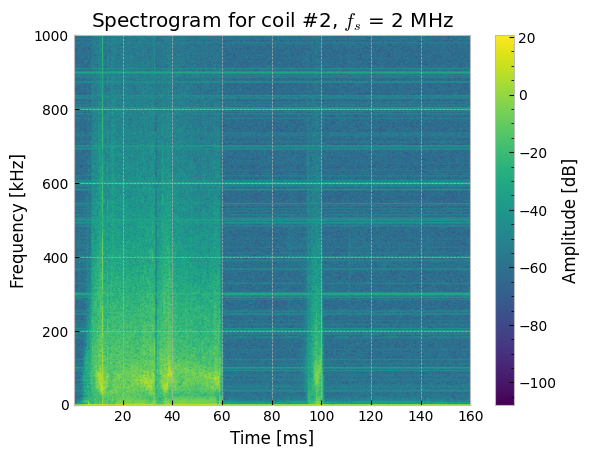

In [141]:
# Matplotlib:

# Setup figures
fig, ax1 = plt.subplots()

Pxx, freqs, bins, im = plt.specgram(Coil_2_data, NFFT=NFFT, Fs=fs, noverlap=int (NFFT/2))
cbar = plt.colorbar(im, label = r'Amplitude [dB]') # Power spectral density amplitude!
cbar.minorticks_on()
plt.title(r'Spectrogram for coil #2, $f_{s}$' + f' = {fs * 1e-6:.0f} MHz')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [ms]')

scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)

scale_x = 1e-3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax1.xaxis.set_major_formatter(ticks_x)

# plt.axis((45e-3, 50e-3, 0, 200e3)) # Chosen interval!
plt.savefig('Coil2_Spectrogram.svg', format = 'svg')
plt.show()

# Characteristics (comparison with scipy.signal.spectrogram):
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html
# detrend=False
# mpl_specgram_window = plt.mlab.window_hanning(np.ones(NNFT))
# window=mpl_specgram_window (Hanning window)
# Return power spectral density, not power spectrum!

In [142]:
# # Scipy:
# mpl_specgram_window = plt.mlab.window_hanning(np.ones(NFFT))
# f, t, Sxx = signal.spectrogram(Coil_2_data, fs, detrend=False,
#                                nfft=NFFT, 
#                                window=mpl_specgram_window,
#                                scaling='density',
#                                noverlap=int(NFFT/2)
#                               )
# # assert np.allclose(Sxx,Pxx)
# plt.pcolormesh(t, f, 10*np.log10(Sxx))
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# # plt.axis((None, None, 0, 200e3))
# plt.show()

# Sxx_to_Pxx_dB = 10*np.log10(Sxx/Pxx)
# print(f'Largest difference (ratio in dB) : {np.abs(Sxx_to_Pxx_dB).max():4.3G}')

# # Characteristics (comparison with matplotlib.pyplot.specgram):
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

In [143]:
# Chose interval for power spectrum analysis: 5 ms interval.
# Time limits:
Lower_Lim = 45e3
Upper_Lim = 50e3

indices_gt = np.array(time_2 > Lower_Lim)
indices_st = np.array(time_2 < Upper_Lim)
indices = indices_gt & indices_st
Coil_Selected_data = Coil_2_data[indices]
time_Selected_data = time_2[indices]

# Results:
print(f'For power spectrum analysis:')
print(f'Coil selected data: {Coil_Selected_data}')
print(f'Time selected data: {time_Selected_data}')

For power spectrum analysis:
Coil selected data: [ -15.  -64.  -98. ... -212. -213. -203.]
Time selected data: [45000.5 45001.  45001.5 ... 49998.5 49999.  49999.5]


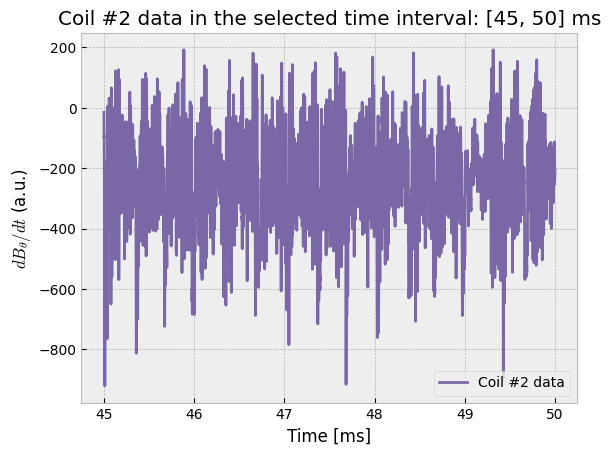

<Figure size 640x480 with 0 Axes>

In [144]:
# Getting to know our data:

plt.plot(time_Selected_data*1e-3, Coil_Selected_data, 'C2-', label=r'Coil #2 data')

plt.xlabel(r'Time [ms]')
plt.ylabel(r'$dB_{\theta}/dt$ (a.u.)')
plt.title(f'Coil #2 data in the selected time interval: [{Lower_Lim*1e-3:.0f}, {Upper_Lim*1e-3:.0f}] ms')

plt.grid(True)
plt.legend()
plt.savefig('Coil2(t)_5ms_Interval.svg', format = 'svg')
plt.show()
plt.clf()

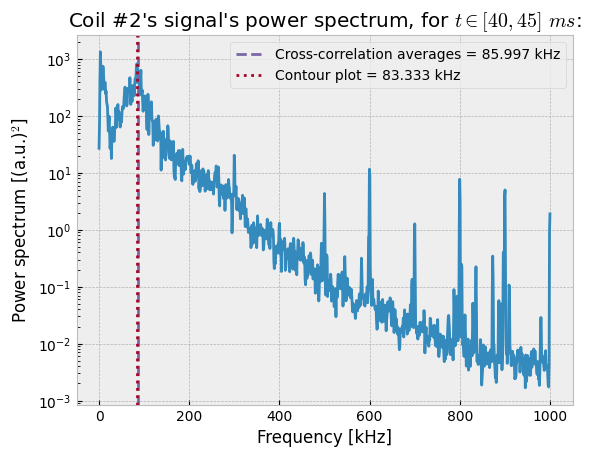

In [145]:
fig, ax1 = plt.subplots()

f, Pxx_den = signal.welch(Coil_Selected_data, fs, nperseg=NFFT, scaling='spectrum') # Default Hann(ing) window, 50% overlap.
plt.semilogy(f, Pxx_den)
plt.xlabel('Frequency [kHz]')
plt.ylabel(r'Power spectrum [(a.u.)$^{2}$]')
# plt.title(f'Coil 2\'s signal\'s power spectrum in the selected time interval: [{Lower_Lim*1e-3:.0f}, {Upper_Lim*1e-3:.0f}] ms')
plt.title(f'Coil #2\'s signal\'s power spectrum, ' + r'for $t\in [40, 45]$ $ms$:') # Smaller title.

scale_x = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax1.xaxis.set_major_formatter(ticks_x)

# Trying to plot most dominant frequency of the perturbation (check values below):
ax1.axvline(x=8.5997e+04, color = 'C2', linestyle    = 'dashed', label = 'Cross-correlation averages = 85.997 kHz')
ax1.axvline(x=8.333e+04, color = 'C1', linestyle    = 'dotted', label = 'Contour plot = 83.333 kHz')

# Might be useful for visualization:
# plt.xlim(0, 200e3)

plt.legend()
plt.savefig('Coil2_Power_Spectrum.svg', format = 'svg')
plt.show()

## Cross-correlation:

In [146]:
# Chose interval for cross-correlation analysis: 3 ms interval.
Lower_Lim_CC = 45e3
Upper_Lim_CC = 48e3

indices_gt_Corr = np.array(time_2 > Lower_Lim_CC)
indices_st_Corr = np.array(time_2 < Upper_Lim_CC)
indices_Corr = indices_gt_Corr & indices_st_Corr

d_Corr={}
for x in range(2, 13):
    if(x!=11):
        d_Corr['Coil{0}'.format(x)] = [d['Coil{0}'.format(x)][0][indices_Corr], d['Coil{0}'.format(x)][1][indices_Corr]]

Coil_2_Selected_data_Corr = d_Corr["Coil2"][0]
time_2_Selected_data_Corr = d_Corr["Coil2"][1]

# Results:
print(f'For cross-correlation analysis:')
print(f'Coil 2 selected data: {Coil_2_Selected_data_Corr}')
print(f'Time 2 selected data: {time_2_Selected_data_Corr}')

For cross-correlation analysis:
Coil 2 selected data: [ -15.  -64.  -98. ... -342. -306. -258.]
Time 2 selected data: [45000.5 45001.  45001.5 ... 47998.5 47999.  47999.5]


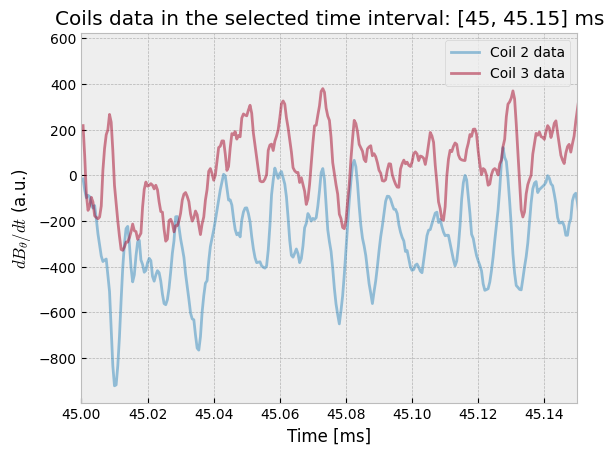

<Figure size 640x480 with 0 Axes>

In [160]:
# Getting to know our data:

for x in range(2, 4):
    if(x!=11):
        plt.plot(d_Corr['Coil{0}'.format(x)][1]*1e-3, d_Corr['Coil{0}'.format(x)][0], label=f'Coil {x} data', alpha = 0.5)

plt.xlabel(r'Time [ms]')
plt.ylabel(r'$dB_{\theta}/dt$ (a.u.)')
plt.title(f'Coils data in the selected time interval: [{Lower_Lim_CC*1e-3:.0f}, 45.15] ms')

plt.xlim(45, 45.15)

plt.grid(True)
plt.legend()
plt.savefig('Velocity_Direction.svg', format = 'svg')
plt.show()
plt.clf()

Coil 2: Time @ maximum = [-5], Velocity = 2.40e+07.
Dominant frequency = 90909.09090909091.

Coil 3: Time @ maximum = [-4], Velocity = 1.50e+07.
Dominant frequency = 83333.33333333333.

Coil 4: Time @ maximum = [0], Velocity = nan (Reference coil).
Dominant frequency = 83333.33333333333.

Coil 5: Time @ maximum = [3], Velocity = 2.00e+07.
Dominant frequency = 90909.09090909091.

Coil 6: Time @ maximum = [6], Velocity = 2.00e+07.
Dominant frequency = 90909.09090909091.

Coil 7: Time @ maximum = [9], Velocity = 2.00e+07.
Dominant frequency = 83333.33333333333.

Coil 8: Time @ maximum = [13], Velocity = 1.85e+07.
Dominant frequency = 83333.33333333333.

Coil 9: Time @ maximum = [18], Velocity = 1.67e+07.
Dominant frequency = 86956.52173913043.

Coil 10: Time @ maximum = [2], Velocity = 1.80e+08.
Dominant frequency = 80000.0.

Coil 12: Time @ maximum = [12], Velocity = 4.00e+07.
Dominant frequency = 86956.52173913043.



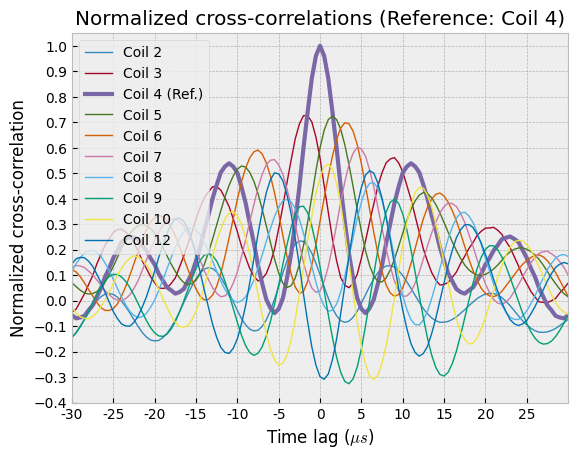

Mean velocity = 1.9161e+07.
Velocity uncertainty = 4.8388e+06.
Mean dominant frequency = 8.5997e+04.
Mean dominant frequency uncertainty = 5.9974e+03.


In [161]:
fig, ax1 = plt.subplots()

CC_Vec = []
Lags = []
Vel_Vec = []
Freq_Vec = []
Pos = []
Time = []

Ref = 4 # Reference coil. Using coil #2 as reference yielded weird results?
for x in range(2, 13):
    if(x!=11):
        if(x==Ref):
            lags, c, _, _ = plt.xcorr(d_Corr['Coil{0}'.format(x)][0], d_Corr[f'Coil{Ref}'][0],
        normed=True, linestyle ='-', marker='', usevlines=False, maxlags=100, label = f'Coil {x} (Ref.)', linewidth = 3)
            CC_Vec.append(c)
            Max_Time = lags[np.argwhere(c==np.max(c))[0]]
            print(f'Coil {x}: Time @ maximum = {Max_Time}, Velocity = nan (Reference coil).')
            # No Vel_Vec.append() here, 'cause of 'nan' velocity.
            peaks, _ = signal.find_peaks(c, height=0.1)
            Freq_Vec.append(1/((peaks[0 + 1]-peaks[0])*Delta_t))
            print(f'Dominant frequency = {1/((peaks[1]-peaks[0])*Delta_t)}.\n')
        else:
            lags, c, _, _ = plt.xcorr(d_Corr['Coil{0}'.format(x)][0], d_Corr[f'Coil{Ref}'][0],
        normed=True, linestyle ='-', marker='', usevlines=False, maxlags=100, label = f'Coil {x}', linewidth = 1)
            CC_Vec.append(c)
            Max_Time = lags[np.argwhere(c==np.max(c))[0]]
            print(f'Coil {x}: Time @ maximum = {Max_Time}, Velocity = {30*(x-Ref)/(Max_Time * Delta_t)[0]:.2e}.')
            Vel_Vec.append(30*(x-Ref)/(Max_Time * Delta_t)[0])
            Pos.append(30*(x-Ref))
            Time.append((Max_Time * Delta_t)[0])
            peaks, _ = signal.find_peaks(c, height=0.1)
            Freq_Vec.append(1/((peaks[0 + 1]-peaks[0])*Delta_t))
            print(f'Dominant frequency = {1/((peaks[1]-peaks[0])*Delta_t)}.\n')

scale_x = Delta_t*1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*scale_x))
ax1.xaxis.set_major_formatter(ticks_x)

# Kinda redundant here... Update: Actually relevant.
plt.xlim(-30/scale_x, 30/scale_x)
plt.ylim(-0.35, 1.05)

# Scales - x and y ticks:
plt.xticks(np.arange(-60, 60, 10))
plt.yticks(np.arange(-0.4, 1.1, 0.1))

plt.xlabel(r'Time lag ($\mu s$)')
plt.ylabel(r'Normalized cross-correlation')
plt.title(f'Normalized cross-correlations (Reference: Coil {Ref})')

plt.legend()
# plt.savefig('Cross_Correlations_2_to_9.svg', format = 'svg')
plt.show()

for i in range(0, len(CC_Vec)):
    CC_Vec[i] = CC_Vec[i][40:161]

Lags = lags[40:161]

# This works ok'ish if we only consider Coils 2 to 9. Coils 10 and 12 mess the results up! Because we have n = 2!
print(f'Mean velocity = {np.mean(Vel_Vec[:-2]):.4e}.') # n: Poloidal mode number. 360/(270 [Coil 12] - 90 [Coil 4]) = 2.
                                                       # So, I shall neglect the last 2 values of Vel_Vec when averaging.
print(f'Velocity uncertainty = {np.max(np.abs(np.array(Vel_Vec[:-2]) - np.mean(Vel_Vec[:-2]))):.4e}.')   

# Print mean dominant frequency:
print(f'Mean dominant frequency = {np.mean(Freq_Vec):.4e}.')
print(f'Mean dominant frequency uncertainty = {np.max(np.abs(np.array(Freq_Vec) - np.mean(Freq_Vec))):.4e}.')   

# Prints for debugging. I think it's correct now!
# print(len(lags))
# print(len(Lags))
# print(len(CC_Vec))

In [177]:
from scipy.optimize import curve_fit

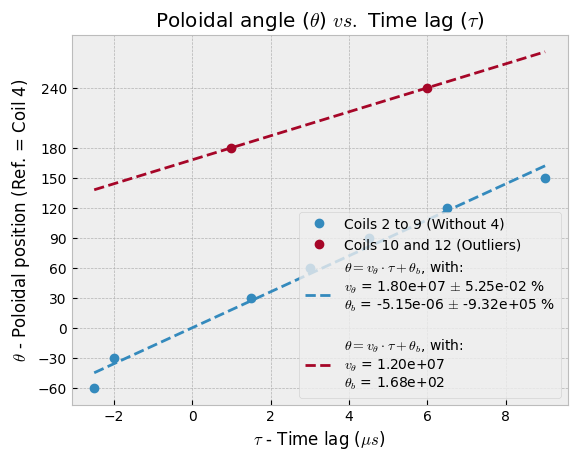

In [221]:
plt.plot(np.array(Time[:-2])*1e6, Pos[:-2], marker = 'o', linestyle = '', label = 'Coils 2 to 9 (Without 4)')
plt.plot(np.array(Time[-2:])*1e6, Pos[-2:], marker = 'o', linestyle = '', label = 'Coils 10 and 12 (Outliers)')

def func(x, a, b):
    return a*x + b
parameters, covariance = curve_fit(func, Time[:-2], Pos[:-2])
perr = np.sqrt(np.diag(covariance))

plt.plot(np.array(Time[:-2])*1e6, func(np.array(Time[:-2]), *parameters), color = 'C0', linestyle = 'dashed',
label=r'$\theta = v_{\theta} \cdot \tau + \theta_{b}$, with:' '\n' + r'$v_{\theta}$ = ' + f'{parameters[0]:.2e} ' + r'$\pm$ ' + f'{perr[0]/parameters[0]:.2e} %\n'
 + r'$\theta_{b}$ = ' + f'{parameters[1]:.2e} ' + r'$\pm$ ' + f'{perr[1]/parameters[1]:.2e} %\n')

parameters_r, covariance_r = curve_fit(func, Time[-2:], Pos[-2:])
perr_r = np.sqrt(np.diag(covariance_r))

plt.plot(np.array(Time[:-2])*1e6, func(np.array(Time[:-2]), *parameters_r), color = 'C1', linestyle = 'dashed',
label=r'$\theta = v_{\theta} \cdot \tau + \theta_{b}$, with:' '\n' + r'$v_{\theta}$ = ' + f'{parameters_r[0]:.2e}\n'
 + r'$\theta_{b}$ = ' + f'{parameters_r[1]:.2e}')

plt.xlabel(r'$\tau$ - Time lag ($\mu s$)')
plt.ylabel(r'$\theta$ - Poloidal position (Ref. = Coil 4)')
plt.title(r'Poloidal angle ($\theta$) $vs.$ Time lag ($\tau$)')

# Scale - y ticks:
plt.yticks([-60, -30, 0, 30, 60, 90, 120, 150, 180, 240]) # Ticks = Coils' positions.

plt.legend()
plt.savefig('Velocity_Fits.svg', format = 'svg')
plt.show()

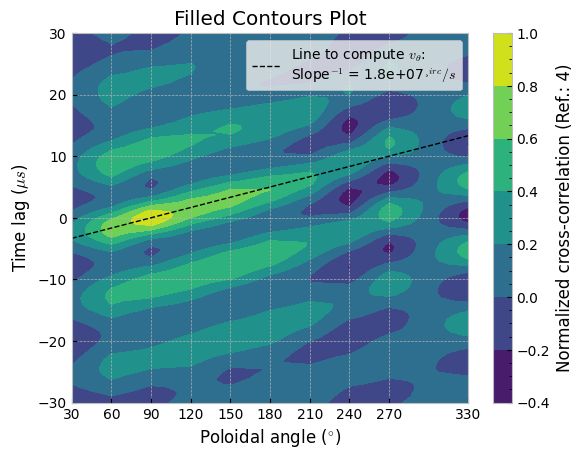

In [149]:
Theta_Vals = [30, 60, 90, 120, 150, 180, 210, 240, 270, 330]
X = Theta_Vals # 10 (N)
Y = Lags*0.5   # 121 (M)
Z = np.array(CC_Vec).T # 10*121 (N*M)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cp, label = f'Normalized cross-correlation (Ref.: {Ref})') # Add a colorbar to a plot
cbar.minorticks_on()
ax.set_title('Filled Contours Plot')
ax.set_xlabel(r'Poloidal angle ($^{\circ}$)')
ax.set_ylabel(r'Time lag ($\mu s$)')
ax.set_xticks(X)

# Line to compute $v_{\theta}$ (manually 'computed' by eye):
ax.plot(X, 5/90*np.array(X) -5, color = 'black',
label = r'Line to compute $v_{\theta}$:' + '\nSlope$^{-1}$ = ' + f'{90/5e-6:.1e}' +r' $^{\c irc}/s$',
linestyle = 'dashed', linewidth = 1)
ax.legend()

plt.savefig('Contour_Plot.svg', format = 'svg')
plt.show()

In [150]:
# From contour plot above:
r = (0.46-0.085)/2 # Probably not accurate... But I got the radii from: https://en.wikipedia.org/wiki/ISTTOK
print(f'Plasma rotation velocity (in the positive $\\theta$ direction)= {90/5e-6:.3e} degrees/s = {np.pi / 10 * 1e6:.3e} rad/s = {np.pi / 10 * r * 1e3:.3f} km/s.')
n = 360/(270 - 90)
print(f'Poloidal mode number = {n:.0f}.') # Verified in both the contour and cross-correlation plots.
f = (1/12)*1e3
print(f'Magnetic fluctuations\' dominant frequency = {f:.3f} kHz.')

# Comparing with previously obtained values:
print(f'\nBefore, I had obtained: Mean velocity = (19.16 +/- 4.84)e+06 degrees/s.\nMean dominant frequency = (86.00 +/- 6.00)e+03 Hz.')

Plasma rotation velocity (in the positive $\theta$ direction)= 1.800e+07 degrees/s = 3.142e+05 rad/s = 58.905 km/s.
Poloidal mode number = 2.
Magnetic fluctuations' dominant frequency = 83.333 kHz.

Before, I had obtained: Mean velocity = (19.16 +/- 4.84)e+06 degrees/s.
Mean dominant frequency = (86.00 +/- 6.00)e+03 Hz.


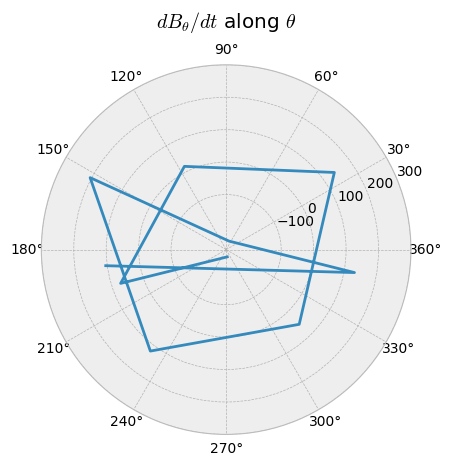

In [151]:
# Testing:
theta = Theta_Vals
data = [np.mean(d_Corr[f'Coil{i}'][0][2500:4500]) for i in range(2, 13) if(i!=11)]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, data)
ax.set_rmax(300)
ax.set_rticks([-100, 0, 100, 200, 300])  # Less radial ticks
ax.set_xticks(np.pi/180. * np.linspace(360,  0, 12, endpoint=False))
ax.grid(True)

ax.set_title(r'$dB_{\theta}/dt$ along $\theta$', va='bottom')
plt.show()

In [152]:
print('$v_{\\theta}$' + f' = {1.8e7/360} rotations/sec.')

$v_{\theta}$ = 50000.0 rotations/sec.


In [153]:
print(f'Before, I had obtained: Mean velocity = {19.16e+06/360:.3f} +/- {4.84e+06/360:.3f} rotations/sec.')

Before, I had obtained: Mean velocity = 53222.222 +/- 13444.444 rotations/sec.
